```yaml
title: MyST Markdown Integration for Jupyter Notebooks
description: This notebook explores the conventions for yaml frontmatter in MyST Formatted notebooks and some of the tool's other features.
date: 2024-01-04
```

In [2]:
%%html
<style>
    body {
        /* change --vscode-font-family if it's different on your system */
        --vscode-font-family: "lmroman17-regular"
    }
</style>

# MyST Markdown and Jupyter Notebook

[MyST-NB](https://myst-nb.readthedocs.io/en/latest/) is a Spinx and Docutils extension for compiling Jupyter Notebooks into high quality documentation formats.

This extension will allow us to mix Jupyter notebooks with text-based notebooks, Markdown, and RST documents. Using MyST flavored Markdown syntax --which extends [CommonMark Markdown](https://commonmark.org/) language including admonitions and [additional syntax](https://myst-parser.readthedocs.io/en/latest/syntax/typography.html)-- we can author technical and scientific documentation through our regular Jupyter interface and render beautiful PDFs, MS Word Documents, LaTeX, and more.

I am really excited by using MyST as a potential substitute for my original `Pandoc` configuration project and want to turn this Jupyter setup into it's own separate build script so that it can be used added to future Jupyter environments.

:::{important} Objectives
An important objective of this Jupyter Notebook is to understand the implementation of MyST and it's tools to generate better notebooks that can be converted to publish-quality products. 
:::

# Getting Started with MyST & Sphinx



# [Frontmatter](https://mystmd.org/guide/frontmatter)

Frontmatter allows you to specify metadata and options about how your project should behave or render. Included in frontmatter are things like the document or project `title`, what `thumbnail` to use for sit or content previews, `authors` that contributed to the work, and scientific identifiers like a `doi`. Adding frontmatter ensures that these properties are available to downstream tools or build processes like building **Scientific PDFs**.

## Where to set frontmatter

Frontmatter can be set in a markdown (`md`) or notebook (`ipynb`) file (described as a "page" below) or in the `project:` section of a `myst.yml` file. When project frontmatter is set in a `myst.yml` file, those settings will be applied to all content in that project (apart from "page only" fields).

### In a MyST markdown file

A frontmatter section can be added at the top of any `md` file using `---` delimiters.

```yaml
title: My First Article
date: 2024-01-04
authors:
    - Nyki Anderson
      affiliations:
        - University of Europe
```

### In a Jupyter Notebook

Frontmatter can be added to the first cell of a Jupyter Notebook, that cell should be a Markdown cell and use `---` delimiters as above.

> **Hint!** Install JupyterLab Myst
> To have properly formatted frontmatter, you can install the `jupyterlab-myst` plugin for Jupyter.
>
> `pip install jupyterlab_myst`
>
> Without the extension installed, remember to format the contents of the section as valid `yaml` even though when rendered, the cell will not look well formatted in your notebook.

### In a `myst.yml` file

Frontmatter fields can be added directly to any `project:` section within a `myst.yml` file. If your root `myst.yml` file only contains a `site:` section, and you want to add frontmatter, add a `project:` section at the top level and add the fields there, e.g.,

```yaml
myst: v1
site: 
project:
    license: CC-BY-4.0
    open_access: true
```

## Available frontmatter fields

The following table lists the available frontmatter fields, a brief description and a note on how the field behaves depending on whether it is set on a page or at the project level. Where a field itself is an object with sub-fields, see the relevant description on the page below.

- `title` - a string (page & project)
- `description` - a string (page & project)
- `short_title` - a string (page & project)
- `name` - a string (page & project)
- `tags` - a list of strings (page only)
- `thumbnail` - a link to a local or remote image (page only)
- `subtitle` - a string (page only)
- `date` - a valid date (page can override project)
- `authors` - a list of author objects (page can override project)
- `affiliations` - a list of affiliation objects (page can override project)
- `doi` - a valid DOI, either URL or id (page can override project)
- `arxiv` - a valid arXiv reference, either URL or id (page can override project)
- `open_access` - boolean (page can override project)
- `license` - a license object or a string (page can override project)
- `funding` - a funding object (page can override project)
- `github` - a valid GitHub URL or `owner/reponame` (page can override project)
- `binder` any valid URL (page can override project)
- `subject` - a string (page can override project)
- `venue` - a venue object (page can override project)
- `biblio` - a biblio object with various fields (page can override project)
- `math` - a dictionary of math macros (page can override project)
- `abbreviations` - a dictionary of abbreviations in the project (page can override project)
- `parts` - a dictionary of arbitrary content parts, not part of the main article, for example `abstract`, `data_availability` (page only)
- `options` - a dictionary of arbitrary options validated and consumed by templates, for example, during site or PDF build (page can override project)

## Field Behavior

Frontmatter can be attached to a "page", meaning a local `.md` or `.ipynb` or a "project". However, individual frontmatter fields are not uniformly available at both levels, and certain behavior of certain fields are different between project and page levels. There are three field behaviors to be aware of:

- `page & project` : the field is available on both th epage & project but they are independent
- `page only` : the field is only available on pages, and not present on projects and it will be ignored if set there.
- `page can override project` : the field is available on both page & project but the value of the field on the page will override any set of the project. Note that the page field must be omitted or undefined, for the project value to be used, value of `null` (or `[]` in the case of `authors`) will still override the project value but clear the field for that page.

## Thumbnail & Banner

The thumbnail is used in previews for your site in applications like Twitter, Slack, or any other link preview service. This should, by convention, be included in a `thumbnails` folder next to your content. You can also explicitly set this field to any other image on your local file system or a remote URL to an image. This image will get copied over to your public folder and optimized when you build your project.

```yaml
thumbnail: thumbnails/myThumbnail.png
```

If you do not specify an image the first image in the content of a page will be selected. If you explicitly do not want an image, set `thumbnail` to `null`.

You can also set a banner image which will show up in certain themes, for example, the `article-theme`:

---
banner: banner.png
---

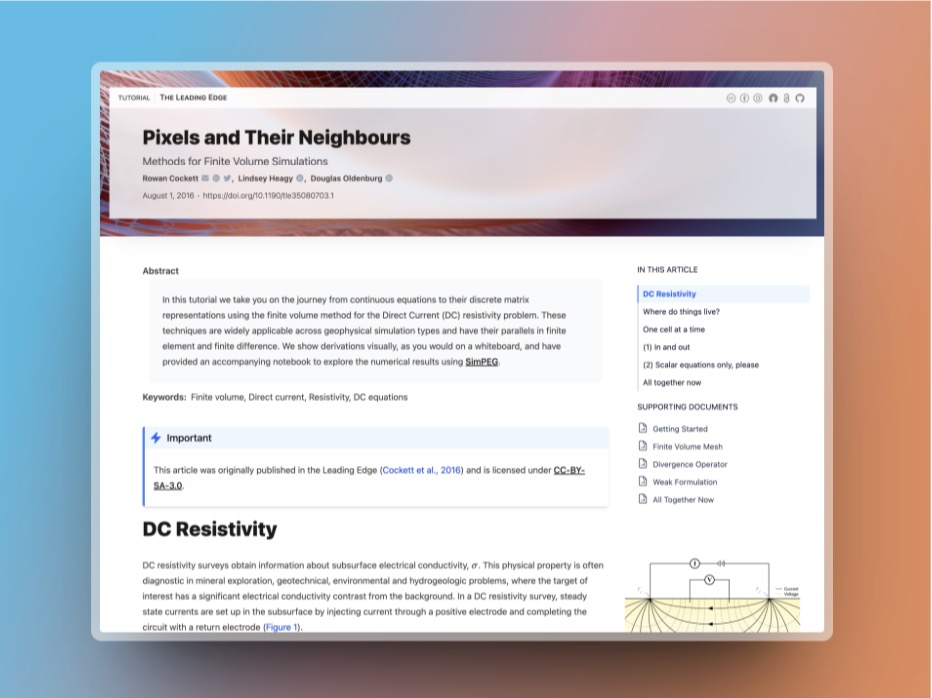

## Authors

The `authors` field is a list of `author` objects. Available fields in the author object are:

- `name` : a string OR CSL-JSON author object - the author's full name; if a string, this will be parsed automatically. Otherwise, the object may contain `given`, `surname`, `non_dropping_particle`, `dropping_particle`, `suffix`, and full name `literal`.
- `orcid` : a string - a valid ORCID identifier with or without the URL.
- `corresponding` : boolean - flags any corresponding authors, you must include an `email` if true.
- `url` : a string - website or homepage of the author.
- `roles` : a list of strings - must be valid **CRediT Contributor Roles**.

```yaml
authors:
    - name: Nyki Anderson
      roles:
        - Conceptualization
        - Data curation
        - Validation
```

> **CRediT Roles**
>
> There are 14 official contributor roles that are in the NISO CRediT Role standard. In addition to British english, incorrect case or punctuation, there are also a number of aliases that can be used for various roles.
>
> - Conceptualization (alias: conceptualisation)
> - Data curation
> - Formal analysis (alias: analysis)
> - Funding acquisition
> - Investigation
> - Methodology
> - Project administration (alias: administration)
> - Resources
> - Software
> - Supervision
> - Validation
> - Visualization (alias: visualisation)
> - Writing - original draft (alias: writing)
> - Writing - review & editing (alias: editing, review)

- `affiliations` : a list of strings that identify or create an affiliation or a full `Affiliation` object, for example:

```yaml
authors:
    - name: Nyki Anderson
      affiliations:
        - id: ubc
          institution: University of British Columbia
          ror: 034rmrcq20
          department: Earth, Ocean and Atmospheric Sciences
        - ACME Inc
    - name: Julian Todman
      affiliation: ubc   
```

See [Affiliations](https://mystmd.org/guide/frontmatter#affiliations) for more information on how to concisely write affiliations.

- `equal-contributor` : a boolean, indicates that the author is an equal contributor.
- `deceased` : a boolean, indicates that the author is a deceased.
- `twitter` : a twitter username.
- `github` : a GitHub username.
- `note` : a string, a freeform field to indicate additional information about the author, for example, acknowledgments or specific correspondence information.
- `phone` : a phone number, e.g., (301) 754 - 5766.
- `fax` : for people who still use these machines.

## Affiliations

You can create an affiliation directly by adding it to an author, and it can be as simple as a single string.

```yaml
authors:
    - name: Nyki Anderson
      affiliation: University of British Columbia
```

You can also add much more information to any affiliation, such as a ROR, ISNI, or an address. A very complete affiliations list for an author at the University of British Columbia is:

```yaml
authors:
    - name: Nyki Anderson
      affiliations:
        - id: ubc
          institution: University of British Columbia
          ror: https://ror.org/03rmrcq20
          isni: 0000 0001 2288 9830
          department: Department of Earth, Ocean and Atmospheric Sciences
          address: 2020 - 2207 Main Mall
          city: Vancouver
          region: British Columbia
          country: Canada
          postal_code: V6T 1Z4
          phone: 604 822 2449
    - name: Julian Todman
      affiliation: ubc   
```

Notice how you can use an `id` to avoid writing this out for every coauthor. Additionally, if the affiliation is a single string and contains a semi-colon `;` it will be treated as a list. The affiliations can also be added to your `project` frontmatter in your `myst.yml` and used across any document i the project.

```yaml
# article.md
title: My Article
authors:
  - name: Nyki Anderson
    affiliation: ubc
  - name: Julian Todman
    affiliations: ubc; stanford
```

```yaml
# myst.yml
affiliations:
  - id: ubc
    institution: University of British Columbia
    ror: https://ror.org/03rmrcq20
    isni: 0000 0001 2288 9830
    department: Department of Earth, Ocean and Atmospheric Sciences
    address: 2020 – 2207 Main Mall
    city: Vancouver
    region: British Columbia
    country: Canada
    postal_code: V6T 1Z4
    phone: 604 822 2449
  - id: stanford
```

If you use a string that is not recognized as an already defined affiliation in the project or article frontmatter, an affiliation will be created automatically and normalized so that it can be referenced:

```yaml
# Written Frontmatter
authors:
  - name: Marissa Myst
    affiliations:
      - id: ubc
        institution: University of British Columbia
        ror: 03rmrcq20
        department: Earth, Ocean and Atmospheric Sciences
      - ACME Inc
  - name: Miles Mysterson
    affiliation: ubc
```

```yaml
# Normalized
authors:
  - name: Marissa Myst
    affiliations: ['ubc', 'ACME Inc']
  - name: Miles Mysterson
    affiliations: ['ubc']
affiliations:
  - id: ubc
    institution: University of British Columbia
    ror: https://ror.org/03rmrcq20
    department: Earth, Ocean and Atmospheric Sciences
  - id: ACME Inc
    name: ACME Inc
```

- `id` : a string - local identifier that can be used to easily reference a repeated affiliation.
- `name` : a string - the affiliation name. Either `name` or `institution` is required.
- `institution` : a string - Name of an institution or organization (for example, a university or corporation). If your research group has a name, you can use both `name` and `institution`, however, at least one of these is required.
- `department` : a string - the affiliation department (e.g., Chemistry).
- `doi, ror, isni, ringgold` : identifiers for the affiliation (DOI, ROR, ISNI, and Ringgold). We suggest using https://ror.org if possible to search for your institution.

```yaml
affiliations:
  - name: Boston University
    ringgold: 1846
    isni: 0000 0004 1936 7558
    ror: 05qwgg493
    doi: 10.13039/100018578
```

- `email` : a string - email of the affiliation, required if `corresponding` is `true`.
- `address, address`, `city`, `state`, `postal code`, and `country` : affiliation address information, in place of `state` you can use `province` or `region`.
- `url` : a string - website or homepage of the affiliation (`website` is an alias).
- `phone` : a phone number, e.g., (301) 754 5766.
- `fax` : A fax number for the affiliation.
- `collaboration` : a boolean - indicate that the affiliation is a collaboration, for example, "MyST Contributors" can be both an affiliation and a listed author. This is used in certain templates as well as in **JATS**.

## Date

The date field is a string and should conform to a valid Javascript data format. Examples of acceptable date formats are:

```yaml
2021-12-14T10:43:51.777Z - an ISO 8601 calendar date extended format, or
14 Dec 2021
14 December 2021
2021, December 14
2021 December 14
12/14/2021 - MM/DD/YYYY
12-14-2021 - MM-DD-YYYY
2022/12/14 - YYYY/MM/DD
2022-12-14 - YYYY-MM-DD
```

Where the latter example in that list are valid **IETF-timestamps**.

## Licenses

This field can be set to a string value directly or to a License object.

Available fields in the License object are `content` and `code` allowing licenses to be set separately for these two forms of content, as often different subsets of licenses are applicable to each. If you only wish to apply a single license to your page or project use the string form rather than an object.

String values for licenses should be a valid "Identifier" string from the [SPDX License List](https://spdx.org/licenses/). Identifiers for well-known licenses are easily recognizable (e.g., `MIT` or `BSD`) and MyST will attempt to infer the specific identifier if an ambiguous license is specified (e.g., `GPL` will be interpreted as `GPL-3.0+` and a warning raised letting you know of this interpretation). Some common licenses are:

```yaml
# Common Content Licenses
CC-BY-4.0
CC-BY-SA-4.0
CC-BY-N-SA-4.0
CC0-1.0
```

```yaml
# Common Code Licenses
MIT
BSD
GPL-3.0+
Apache-2.0
LGPL-3.0-or-later
AGPL
```

By using the correct SPDX Identifier, your website will automatically use the appropriate icon for the license and link to the license definition.

## Funding

Funding frontmatter is able to contain multiple funding and open access statements, as well as award info.

It may be as simple as a single funding statement:

```yaml
funding: This work was supported by University.
```

Funding may also specify award id, name, sources (`affiliation object` or `reference`), investigators (`contributor objects` or `references`), and recipients (`contributor objects` or `references`).

```yaml
authors:
  - id: auth0
    name: Jane Doe
funding:
  statement: This work was supported by University.
  id: award-id-000
  name: My Award
  sources:
    - name: University
  investigators:
    - name: John Doe
  recipients:
    - auth0
```

Multiple funding objects with multiple awards are also possible:

```yaml
authors:
  - id: auth0
    name: Jane Doe
funding:
  - statement: This work was supported by University.
    awards:
      - id: award-id-000
        name: My First Award
        sources:
          - name: University
        investigators:
          - name: John Doe
        recipients:
          - auth0
      - id: award-id-001
        name: My Second Award
        sources:
          - name: University
        investigators:
          - name: John Doe
        recipients:
          - auth0
  - statement: Open access was supported by Consortium.
    open_access: Users are allowed to reproduce without prior permission
    awards:
      - id: open-award-999
        sources:
          - name: Consortium
```

## Venue

The term `venue` is borrowed from the **OpenAlex** API definition: 

**Venues are where works are hosted**.

Available fields in the `venue` object are `title` and `url`.

Some typical `venue` values may be:

```yaml
venue:
  title: Journal of Geophysics
  url: https://journal.geophysicsjournal.com
```

```yaml
venue:
  title: EuroSciPy 2022
  url: https://www.euroscipy.org/2022
```

## Biblio

The term `biblio` is borrowed from the **OpenAlex** API definition:

**Old-timey bibliographic info for this work. This is mostly useful only in citation/reference contexts. These are all strings because sometimes you'll get fun values like "Spring" and "Inside cover."**

Available fields in the `biblio` object are `volumne`, `issue`, `first_page` and `last_page`.

Some example `biblio` values may be:

```yaml
biblio:
  volume: '42'
  issue: '3'
  first_page: '1' # can be a number or string
  last_page: '99' # can be a number or string
```

```yaml
biblio:
  volume: '2022'
  issue: Winter
  first_page: Inside cover # can be a number or string
```

# [Settings](https://mystmd.org/guide/settings)

The `settings` field in the project or page frontmatter allows you to change how the parsing, transforms, plugins, or other behaviors of mystmd.

## Available settings fields

- `output_stderr` : Remove, warn, or error on `stderr` outputs (e.g., `DeprecationWarnings`, `RuntimeWarnings`).
  
  - `show` : (default) : show all `stderr` (unless a `remove-stderr` tag is present on  the cell).
  - `remove` : remove all `stderr` outputs.
  - `remove-warn` or `remove-error` : remove all `stderr`, and log a warning or error.
  - `warn` or "error" : log a warning or error if a `stderr` is found.

- `output_stdout` : Remove, warn or error on `stdout` outputs. (e.g., long text outputs, like text-based progress bars).
  - `show` : (default) : show all `stdout` (unless a `remove-stdout` tag is present on the cell).
  - `remove-warn` or `remove-error` : remove all `stdout`, and log a warning or error.
  - `warn` or "error" : log a warning or error if a `stdout` is found.

- `output_matplotlib_strings` : Remove, warn, or error on matplotlib strings outputs. (e.g., <Figure size 720x576 with 1 Axes> or Text(0.5, 0.98, 'Test 1')). These can also be suppressed by ending your cell content with a semicolon in Jupyter Notebooks. The default is to remove these and warn (`remove-warn`).
  - `show` : show al matplotlib strings in outputs.
  - `remove` : remove all matplotlib strings in outputs
  - `remove-warn` : (default) or `remove-error` : remove all matplotlib strings in outputs, and log a warning or error.
  - `warn` or "error" : log a warning or error if matplotlib strings in outputs.

# More From MyST Markdown

Most of this Notebook has been focused on the use of frontmatter to enrich the quality and dynamism of our projects. But from skimming through the extensive documentation, it is clear that MyST Markdown Tools might have more value than just allowing richer metadata in Jupyter Notebooks. 

According to the [MyST Markdown homepage](https://mystmd.org/guide), their tools are designed to revolutionize scientific communication in its various forms. Labeling itself an "authoring framework," MyST products handle blogs, online books, scientific papers, reports, and journal articles. 

## Key Features

- **Rabbit-hole links** allow you to get information to your reader as fast as possible and they can deep-dive all the way to computations, code, and interactive figures.
- **Live graphs** can be embedded directly in your documentation or articles with computation backed by Jupyter --running locally, on Binder, or directly in your browser.
- **JupyterLab support** for MyST comes with inline computations, support for `ipywidgets`, matplotlib sparklines, editable task-lists, rich frontmatter (as we know already), and beautiful typography and other elements like dropdowns, grids and cards.
- **Export to PDF** is easy and they support hundreds of different journals out of the box, see [myst-templates](https://github.com/myst-templates). You can also export to Microsoft Word or JATS, which is used in scientific publishing.

## Project Goals

MyST is part of the [Executable Books](https://executablebooks.org/) organization, which is a community driven project to improve scientific communication, including integrations into Jupyter Notebooks and computational results.

### Built for Science

Extend Markdown with equations, cross-references, citations, and export to preprint or rich, interactive website or book.

### Dynamic Documents 

Make your pages interactive by connecting to custom JupyterHubs, public Binders, or even Python directly in your browser.

### Fast & Accessible

Publish next-generation articles and books that are beautifully designed, without compromising on accessibility or performance.

### Technical Goals

- `mystmd` is a Javascript parser and command line tool for working with MyST Markdown.
- Parse MyST into a standardized **AST**, that follows the MyST Spec.
- Translate and render MyST into:
    - Modern **interactive websites**, using React.
    - PDFs and LaTeX documents, with specific templates for over 400 journals.
    - Microsoft Word **export**.

- Provide functionality for *cross-referencing*, *external structured links*, and *scientific citations*.
 
## Installing the MyST Markdown CLI

`mystmd` is a command line interface that provides modern tooling for technical writing, reproducible science, and creating scientific & technical websites. To get started, install `mystmd`.

### Prerequisites - Install Node

You should have these programs installed already from our last Notebook:

- `Node.js` version >=18.0.0
- `npm` version >=7.0.0
- A code and notebook editor (`VS Code` and `Jupyter Lab` for notebooks).

### Install the MyST CLI

Install node https://nodejs.org/ or through conda.

In [ ]:
conda install -c conda-forge 'nodejs>=20,<21'

Then install `mystmd`:

In [3]:
conda install mystmd -c conda-forge

Retrieving notices: ...working... done
Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


## Circle Back at a Later Date

All of the promising features of MyST have certainly piqued my interests though much of the functionality is beyond the scope of the current state of my many projects. I will certainly be returning to this documentation when I begin publishing my Ancestry Research findings and as academic or professional opportunities come my way. 

For now, we will focus our attention on producing thorough metadata through page-level directives and potentially project level-directives as we become more comfortable with the Jupyter Notebook system as a whole. 

Let's run back through this and the previous Notebook to input some quick metadata and move on to the next topic.